<h1 style="color:red;">Assignment-5 DS-III</h1>

### Importing Libraries

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
dir='/content/drive/MyDrive/cifar-3class-data/train'

### Created a Function to Load Images in Google Colab

In [10]:
def load_images(directory):
    images=[]
    labels=[]
    for label in os.listdir(directory):
      label_path = os.path.join(directory, label)
      for filename in os.listdir(label_path):
                file_path = os.path.join(label_path, filename)
                img = Image.open(file_path)
                images.append(np.array(img))
                labels.append(int(label[-1]))
    return np.array(images),np.array(labels)


In [11]:
files,labels = load_images(dir)

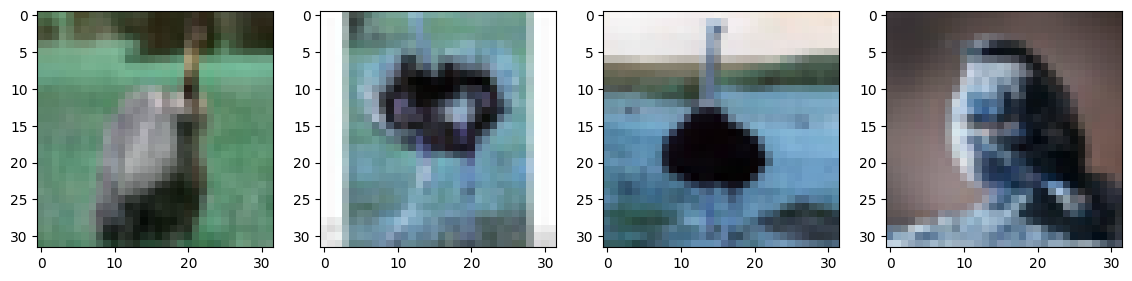

In [12]:
plt.figure(figsize=(14,8))
plt.subplot(1,4,1)
plt.imshow(files[0])
plt.subplot(1,4,2)
plt.imshow(files[1])
plt.subplot(1,4,3)
plt.imshow(files[2])
plt.subplot(1,4,4)
plt.imshow(files[3])

# FCNN

### Creating a Function to Flatten and Normalize the images b/w [0,1]

In [13]:
def flatten_n_normalize(images):
    num_images, height, width, channels = images.shape
    flattened_images = images.reshape((num_images, height * width * channels))
    return flattened_images/255

In [14]:
files=flatten_n_normalize(files)

In [15]:
files.shape

(1500, 3072)

In [16]:
files

array([[0.32941176, 0.4627451 , 0.32941176, ..., 0.42745098, 0.57254902,
        0.48627451],
       [1.        , 1.        , 1.        , ..., 0.85098039, 0.85098039,
        0.85490196],
       [0.96470588, 0.95294118, 0.93333333, ..., 0.30588235, 0.40784314,
        0.49803922],
       ...,
       [0.57254902, 0.58823529, 0.58039216, ..., 0.66666667, 0.72941176,
        0.77254902],
       [0.60784314, 0.58823529, 0.5254902 , ..., 0.45098039, 0.43137255,
        0.39215686],
       [0.99607843, 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ]])

In [17]:
print(len(labels))

1500


### Created Validation Set of 10% Training Data

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(files,labels,test_size=0.1,random_state=42)

In [19]:
files[0]

array([0.32941176, 0.4627451 , 0.32941176, ..., 0.42745098, 0.57254902,
       0.48627451])

# Creating FCNN Architecture

In [20]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,Y_train,epochs=500,batch_size=200,validation_data=(X_test,Y_test))

Epoch 1/500
7/7 [==============================] - 7s 58ms/step - loss: 1.6672 - accuracy: 0.3341 - val_loss: 1.1740 - val_accuracy: 0.3400
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 1.0984 - accuracy: 0.4126 - val_loss: 0.9843 - val_accuracy: 0.5467
Epoch 3/500
7/7 [==============================] - 0s 15ms/step - loss: 0.9722 - accuracy: 0.5467 - val_loss: 0.9619 - val_accuracy: 0.5600
Epoch 4/500
7/7 [==============================] - 0s 13ms/step - loss: 0.9226 - accuracy: 0.5867 - val_loss: 0.8566 - val_accuracy: 0.6533
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8576 - accuracy: 0.6348 - val_loss: 0.8031 - val_accuracy: 0.6867
Epoch 6/500
7/7 [==============================] - 0s 13ms/step - loss: 0.8541 - accuracy: 0.6356 - val_loss: 0.8399 - val_accuracy: 0.6000
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.7871 - accuracy: 0.6807 - val_loss: 0.7991 - val_accuracy: 0.6533
Epoch 8/500
7/7 [===

## Plotting epoch-wise training and validation accuracies in the same plot

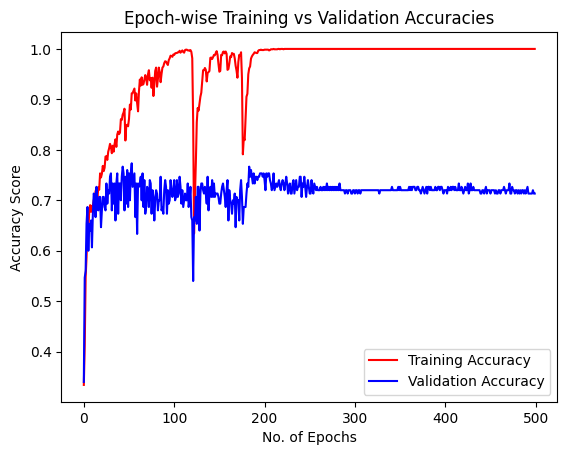

In [23]:
plt.plot(history.epoch,history.history['accuracy'],color='r',label='Training Accuracy')
plt.plot(history.epoch,history.history['val_accuracy'],color='b',label='Validation Accuracy')
plt.title("Epoch-wise Training vs Validation Accuracies")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Loading the Test Data

In [24]:
test_data,test_label=load_images('/content/drive/MyDrive/cifar-3class-data/test')

In [25]:
test_data=flatten_n_normalize(test_data)

## Evaluating the Model on Test Data and Computing Loss and Accuracy Score

In [26]:
evaluate=model.evaluate(test_data,test_label)

10/10 [==============================] - 0s 3ms/step - loss: 2.5195 - accuracy: 0.7333


In [27]:
evaluate[0]

2.5194880962371826

In [28]:
print(f"The Test Loss of the model is {evaluate[0]}")
print(f"The accuracy score of the model is {round(evaluate[1]*100,2)}%")


The Test Loss of the model is 2.5194880962371826
The accuracy score of the model is 73.33%


## **CNN**

In [29]:
training_data,training_labels = load_images('/content/drive/MyDrive/cifar-3class-data/train')

## Creating Validation Set of 10%  Training Data

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(training_data,training_labels,test_size=0.1,random_state=42)

### Performing Normalization on Data

In [31]:
def normalize(X):
    return X/255
X_train=normalize(X_train)
X_test=normalize(X_test)

### Creating the Specified Structure for Architecture for CNN

In [32]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [33]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [34]:
history_cnn = model.fit(X_train,Y_train,epochs=50,batch_size=200,validation_data=(X_test,Y_test))

Epoch 1/50
7/7 [==============================] - 9s 174ms/step - loss: 1.1184 - accuracy: 0.3222 - val_loss: 1.0655 - val_accuracy: 0.6467
Epoch 2/50
7/7 [==============================] - 0s 37ms/step - loss: 1.0086 - accuracy: 0.5207 - val_loss: 0.9165 - val_accuracy: 0.7333
Epoch 3/50
7/7 [==============================] - 0s 35ms/step - loss: 0.8937 - accuracy: 0.6430 - val_loss: 0.7857 - val_accuracy: 0.7067
Epoch 4/50
7/7 [==============================] - 0s 35ms/step - loss: 0.7150 - accuracy: 0.7052 - val_loss: 0.7803 - val_accuracy: 0.6733
Epoch 5/50
7/7 [==============================] - 0s 37ms/step - loss: 0.6962 - accuracy: 0.7156 - val_loss: 0.6329 - val_accuracy: 0.7333
Epoch 6/50
7/7 [==============================] - 0s 36ms/step - loss: 0.6004 - accuracy: 0.7659 - val_loss: 0.5695 - val_accuracy: 0.7600
Epoch 7/50
7/7 [==============================] - 0s 36ms/step - loss: 0.5166 - accuracy: 0.7770 - val_loss: 0.5254 - val_accuracy: 0.7933
Epoch 8/50
7/7 [==========

## Saving the model

In [35]:
model.save("/content/drive/MyDrive/cifar-3class-data/my_cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


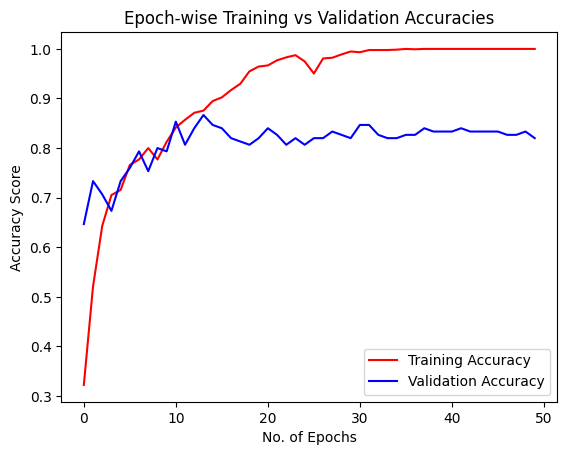

In [36]:
plt.plot(history_cnn.epoch,history_cnn.history['accuracy'],color='r',label='Training Accuracy')
plt.plot(history_cnn.epoch,history_cnn.history['val_accuracy'],color='b',label='Validation Accuracy')
plt.title("Epoch-wise Training vs Validation Accuracies")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [37]:
test_data,test_label=load_images('/content/drive/MyDrive/cifar-3class-data/test')

In [38]:
test_data=normalize(test_data)

## Loading the Model for Prediction

In [39]:
loaded_model = keras.models.load_model("/content/drive/MyDrive/cifar-3class-data/my_cnn_model.h5")

In [40]:
Y_pred=loaded_model.predict(test_data)

10/10 [==============================] - 0s 16ms/step


### Class Probabilities of Test Data

In [41]:
Y_pred

array([[6.83833122e-01, 6.54619187e-04, 3.15512270e-01],
       [4.45318483e-02, 7.24219339e-12, 9.55468118e-01],
       [8.26959014e-01, 1.72479838e-01, 5.61151071e-04],
       [1.16542947e-11, 2.06139424e-12, 1.00000000e+00],
       [7.28903830e-12, 1.22220845e-10, 1.00000000e+00],
       [9.99565423e-01, 4.30744461e-04, 3.86814327e-06],
       [3.74459091e-07, 3.55170476e-10, 9.99999642e-01],
       [1.76900148e-08, 1.00000000e+00, 6.19284897e-14],
       [3.78031917e-09, 1.51482240e-08, 1.00000000e+00],
       [9.99995470e-01, 4.94939749e-14, 4.48805804e-06],
       [2.08220168e-04, 7.38611959e-07, 9.99791086e-01],
       [1.46637022e-14, 4.05537827e-14, 1.00000000e+00],
       [1.06542274e-01, 1.33937419e-06, 8.93456340e-01],
       [3.78353178e-07, 3.18119744e-13, 9.99999642e-01],
       [2.19935188e-14, 1.36079793e-11, 1.00000000e+00],
       [1.09337450e-09, 1.00806326e-13, 1.00000000e+00],
       [9.95750565e-11, 2.86073986e-12, 1.00000000e+00],
       [1.26830384e-03, 5.01171

## Using the argmax to assign class

In [42]:
predicted_class= np.argmax(Y_pred,axis=1)

In [43]:
print(f"The accuracy score of the model is {round(accuracy_score(test_label,predicted_class)*100,2)}%")

The accuracy score of the model is 82.67%


## Computing the Confusion Matrix

In [44]:
confusion_matrix(test_label,predicted_class)

array([[74,  7, 19],
       [ 5, 93,  2],
       [17,  2, 81]])

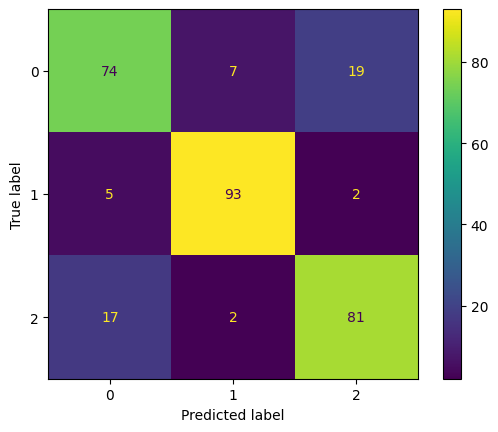

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_label,predicted_class),display_labels=np.unique(test_label))
disp.plot()
plt.show()